In [183]:
import matplotlib.pyplot as plt
import my_lib as my
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

In [184]:
def sigma_frac_ab(a,sa,b,sb):
    return a/b*np.sqrt( np.power(sa/a,2) + np.power(sb/b,2) )
def sigmaV(v):
    return v/100*3 + 10
def sigmaY(v,v0):
    sv = sigmaV(v)
    sv0 = sigmaV(v0)
    s = v/v0*np.sqrt( np.power(sv/v,2) + np.power(sv0/v0,2) )
    return np.abs( np.log(v/v0+s) -  np.log(v/v0-s) )
    

In [185]:
#0,0,0,1000,0,0
V01 = 1000
V02 = 1000
V03 = 500

In [186]:
Data = pd.read_csv('Data.csv').T.to_numpy()

T1 = Data[0]
Y1 = np.log(1-Data[1]/V01)
S1 = sigmaY(Data[1],V01)

T2 = Data[2]
Y2 = np.log(Data[3]/V02)
S2 = sigmaY(V02 - Data[3],V02)

T3 = Data[4]
Y3 = np.log(1-Data[5]/V03)
S3 = sigmaY(Data[5],V03)

In [187]:
m1,sm1,c1,sc1,co1 = my.lin_fit ( T1, Y1, S1, verbose=False,plot=False)
m2,sm2,c2,sc2,co2 = my.lin_fit ( T2, Y2, S2, verbose=True,plot=False)
m3,sm3,c3,sc3,co3 = my.lin_fit ( T3, Y3, S3, verbose=False,plot=False)

m         =  -0.01901585396669662
sigma(m)  =  0.0005368145535461909
c         =  0.04837638408460698
sigma(c)  =  0.07817171472403522
cov(m, c) =  -3.7340835151827555e-05


In [188]:
print("m1 = ",m1,"+-",sm1)
print("m2 = ",m2,"+-",sm2)
print("m3 = ",m3,"+-",sm3)

m1 =  -0.019439775848319296 +- 0.0005445306751088034
m2 =  -0.01901585396669662 +- 0.0005368145535461909
m3 =  -0.035313515736526524 +- 0.0012574454973702854


In [189]:
print("Tau1 = ",-0.1/m1,"+-",-sigma_frac_ab(0.1,0,m1,sm1))
print("Tau2 = ",-0.1/m2,"+-",-sigma_frac_ab(0.1,0,m2,sm2))
print("Tau3 = ",-0.1/m3,"+-",-sigma_frac_ab(0.1,0,m3,sm3))

Tau1 =  5.144092235438285 +- 0.14409199157650468
Tau2 =  5.258769875659269 +- 0.14845424286220413
Tau3 =  2.8317769532237493 +- 0.1008340604191112


Text(0.5, 1.0, 'Fit lineare circuito RC ')

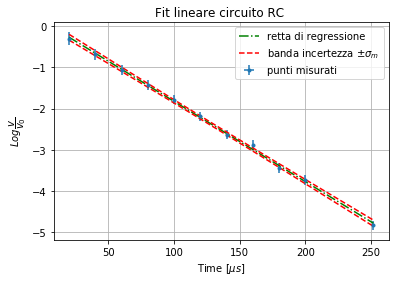

In [202]:
my.fit_graph(T1,Y1,S1,m1,sm1,c1,sc1,co1, grid=True, err=True)
plt.xlabel('Time [$\u03BCs$]')
plt.ylabel('$Log \dfrac{v}{v_{0}}$')
plt.title('Fit lineare circuito RC ')

Text(0.5, 1.0, 'Fit lineare circuito CR')

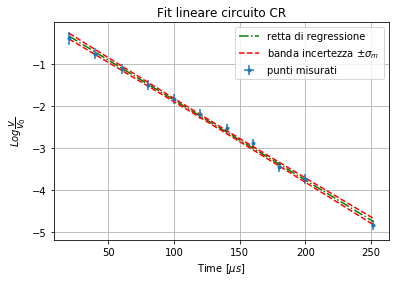

In [203]:
my.fit_graph(T2,Y2,S2,m2,sm2,c2,sc2,co2, grid=True, err=True)
plt.xlabel('Time [$\u03BCs$]')
plt.ylabel('$Log \dfrac{v}{v_{0}}$')
plt.title('Fit lineare circuito CR')

Text(0.5, 1.0, 'Fit lineare circuito RC con Partitore ')

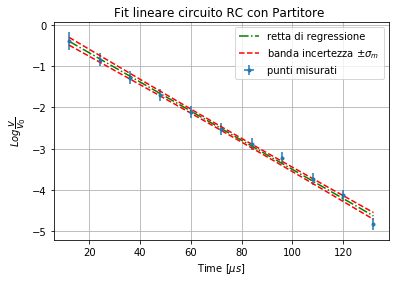

In [205]:
my.fit_graph(T3,Y3,S3,m3,sm3,c3,sc3,co3, grid=True, err=True)
plt.xlabel('Time [$\u03BCs$]')
plt.ylabel('$Log \dfrac{v}{v_{0}}$')
plt.title('Fit lineare circuito RC con Partitore ')

In [193]:
sigmaV(Data[1])

array([17.92, 24.88, 29.68, 32.8 , 34.96, 36.64, 37.84, 38.32, 39.04,
       39.28, 39.76])

In [194]:
sigmaV(V01)

40.0